# Exploring Relationships Part 3

### This script contains the following points:
1. Importing libraries
2. Importing data
3. Exploring relationships
    * Categorical plots, finishing up

### 1. Importing libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [56]:
%matplotlib inline

### 2. Importing data

In [57]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\2019-2021 CDC Natality'

In [58]:
df_flags = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_natality_flags.pkl'))

In [59]:
df_flags.head()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
0,0,Alabama,2019,January,1,high school/GED or less,0,34,3223.149902,27.440001,38.820000,2019-01-01,Winter,South,NBW,not preterm,26-28,average,old
1,1,Alabama,2019,January,1,high school/GED or less,2,30,3482.770020,29.930000,39.070000,2019-01-01,Winter,South,NBW,not preterm,28-30,highest,oldest
2,2,Alabama,2019,January,1,high school/GED or less,3,25,3251.959961,30.760000,38.639999,2019-01-01,Winter,South,NBW,not preterm,30-32,average,old
3,3,Alabama,2019,January,1,high school/GED or less,4,25,3120.399902,28.639999,38.119999,2019-01-01,Winter,South,NBW,not preterm,28-30,low,young
4,4,Alabama,2019,January,1,high school/GED or less,5,12,2938.080078,27.920000,37.500000,2019-01-01,Winter,South,NBW,not preterm,26-28,lowest,youngest


In [60]:
df_flags.tail()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
86432,28650,Wyoming,2021,December,12,bachelor's degree,2,56,3292.620117,29.020000,38.750000,2021-12-01,Winter,West,NBW,not preterm,28-30,high,old
86433,28651,Wyoming,2021,December,12,bachelor's degree,3,29,3372.899902,32.279999,38.480000,2021-12-01,Winter,West,NBW,not preterm,> 32,highest,average
86434,28652,Wyoming,2021,December,12,bachelor's degree,4,11,3488.639893,34.730000,38.730000,2021-12-01,Winter,West,NBW,not preterm,> 32,highest,old
86435,28653,Wyoming,2021,December,12,master's degree,2,22,3173.050049,32.680000,38.270000,2021-12-01,Winter,West,NBW,not preterm,> 32,low,young
86436,28654,Wyoming,2021,December,12,master's degree,3,15,3091.070068,33.330002,38.470001,2021-12-01,Winter,West,NBW,not preterm,> 32,lowest,average


In [61]:
df_flags.shape

(86437, 19)

### 3. Exploring relationships continued

In [62]:
# Making sure index is still suitable to create plots, and hoping to avoid the same error as before.

df_flags.index.is_unique

True

In [63]:
hue_order_5 = ["< 26","26-28","28-30","30-32","> 32"] 

In [64]:
sub = df_flags[['prenatal_start','births','birth_wt_avg','mother_age_avg','gest_age_avg','mother_age_range']]

In [65]:
# Trying to prevent error encountered when trying to sort bars in bar chart.

df_flags.loc[df_flags['mother_ed'] == "high school/GED or less", 'mother_ed'] = "high school GED or less"
df_flags.loc[df_flags['mother_ed'] == "Unknown or Not Stated", 'mother_ed'] = "unknown or not stated"

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school GED or less'),
  Text(1, 0, 'associate degree or some college'),
  Text(2, 0, "bachelor's degree"),
  Text(3, 0, "master's degree"),
  Text(4, 0, 'doctorate or professional degree'),
  Text(5, 0, 'unknown or not stated')])

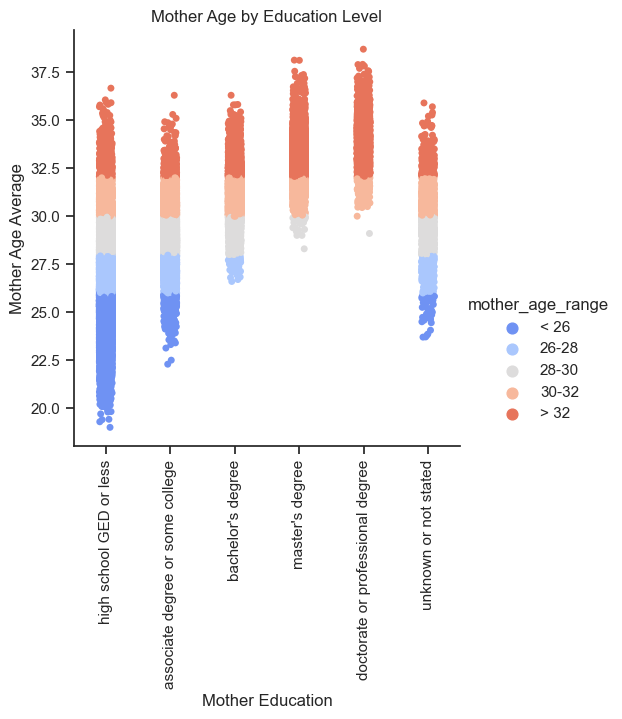

In [66]:
# Categorical plot showing mother average age and prenatal start month.

sns.set(style="ticks")
age_education_cat = sns.catplot(x="mother_ed", y="mother_age_avg", hue="mother_age_range", data=df_flags, palette='coolwarm', hue_order=hue_order_5)
plt.title("Mother Age by Education Level", fontsize=12)
plt.xlabel('Mother Education', fontsize=12)
plt.ylabel('Mother Age Average', fontsize=12) 
plt.xticks(rotation = 90)

In [67]:
age_education_cat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_education_cat.png'), bbox_inches='tight')

#### The above chart shows an interesting connection between mother age and education level. More educated mothers tend to be older, with the more educated a mother is, the older she typically is. Also, this chart connects information with the charts below that focus on birth count by education and age.

In [68]:
df_flags.head()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
0,0,Alabama,2019,January,1,high school GED or less,0,34,3223.149902,27.440001,38.820000,2019-01-01,Winter,South,NBW,not preterm,26-28,average,old
1,1,Alabama,2019,January,1,high school GED or less,2,30,3482.770020,29.930000,39.070000,2019-01-01,Winter,South,NBW,not preterm,28-30,highest,oldest
2,2,Alabama,2019,January,1,high school GED or less,3,25,3251.959961,30.760000,38.639999,2019-01-01,Winter,South,NBW,not preterm,30-32,average,old
3,3,Alabama,2019,January,1,high school GED or less,4,25,3120.399902,28.639999,38.119999,2019-01-01,Winter,South,NBW,not preterm,28-30,low,young
4,4,Alabama,2019,January,1,high school GED or less,5,12,2938.080078,27.920000,37.500000,2019-01-01,Winter,South,NBW,not preterm,26-28,lowest,youngest


In [ ]:
#df2 = pd.DataFrame({
    #'day': ['high school GED or less', 'associate degree or some college', "bachelor's degree", "master's degree", 'doctorate or professional degree', 'unknown or not stated']
    #'num': [0, 1, 2, 3, 4, 5, 6]})

#df = df.sort_values('num')
#dfx = df.groupby(['group'])
#dfx.plot(kind='bar', x='day')

In [42]:
#ed = ["high school GED or less","associate degree or some college","bachelor's degree","master's degree","doctorate or professional degree","unknown or not stated"]

#a = pd.Series(["high school GED or less","associate degree or some college","bachelor's degree","master's degree","doctorate or professional degree","unknown or not stated"])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'associate degree or some college'),
  Text(1, 0, "bachelor's degree"),
  Text(2, 0, 'doctorate or professional degree'),
  Text(3, 0, 'high school GED or less'),
  Text(4, 0, "master's degree"),
  Text(5, 0, 'unknown or not stated')])

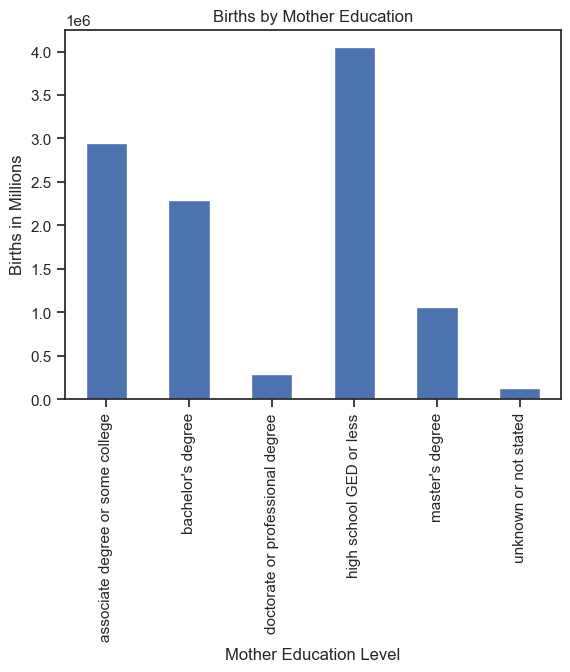

In [75]:
births_ed_bar = df_flags.groupby(['mother_ed'])['births'].sum().plot.bar()
plt.title("Births by Mother Education", fontsize=12)
plt.xlabel('Mother Education Level', fontsize=12)
plt.ylabel('Births in Millions', fontsize=12) 
plt.xticks(rotation = 90)


In [76]:
births_ed_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'births_ed_bar.png'), bbox_inches='tight')

#### The more educated a woman is, the few births she has. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '26-28'),
  Text(1, 0, '28-30'),
  Text(2, 0, '30-32'),
  Text(3, 0, '< 26'),
  Text(4, 0, '> 32')])

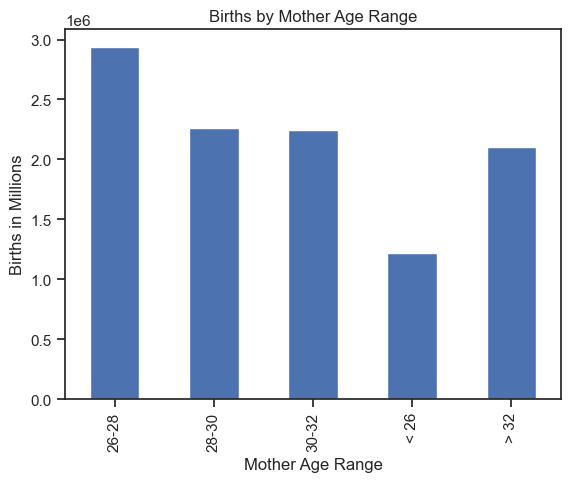

In [78]:
births_age_bar = df_flags.groupby(['mother_age_range'])['births'].sum().plot.bar()
plt.title("Births by Mother Age Range", fontsize=12)
plt.xlabel('Mother Age Range', fontsize=12)
plt.ylabel('Births in Millions', fontsize=12) 
plt.xticks(rotation = 90)


In [79]:
births_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'births_age_bar.png'), bbox_inches='tight')

#### There is some correlation between education and mother's age, but it is not a perfect. Educated women tend to be older, and these educated mothers give birth less. However, not all older women are highly educated, and here it appears that there is less of a difference in birth rates among different ages here than there are for women of different levels of education. However, it will take more exploration to know for sure.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

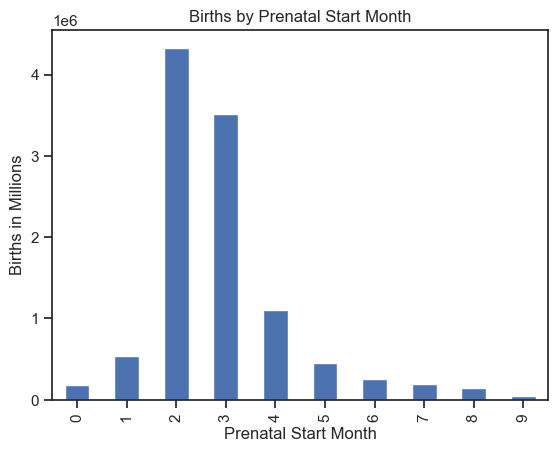

In [80]:
births_prenatal_bar = df_flags.groupby(['prenatal_start'])['births'].sum().plot.bar()
plt.title("Births by Prenatal Start Month", fontsize=12)
plt.xlabel('Prenatal Start Month', fontsize=12)
plt.ylabel('Births in Millions', fontsize=12) 
plt.xticks(rotation = 90)


In [81]:
births_prenatal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'births_prenatal_bar.png'), bbox_inches='tight')

#### We see here that there are more births among women who start prenatal care in the 2-3 months. This may be why we see a greater birth weight and gestational age range in these prenatal care start month categories in other charts.

df_flags.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_flags.pkl'))

### Questions 7: Revisit orginal questions and add new ones
Gestational age and birth weight seem to follow a weak and moderate relationship, respectively, regarding mother's age. However, more analysis is needed to determine if this pattern truly exists. 

Also, charts seem to indicate the later a mother starts prenatal care, the longer her infant's gestational age and birth weight. However, prenatal start month 0 value needs to be corrected to 10, since it reprsents the latest prenatal start month, "no prenatal care." 

Why do women who are more educated tend to give birth to heavier babies with longer gestational time because these mothers are older? 

Do women in their 30s have a greater proportion of low and high weight babies than other age groups? If so, why? Women younger than their 20s actually give birth to more babies, so if women in their 30s have more variation of birth weights and gestational age, it may not be due to the number of women in this age group who give birth.

### Questions 8: Define any hypothesis
Women who are educated tend to be older, and older women tend to have higher weight babies and somewhat longer gestation times than younger women. Also women in their 30s, disproportionally give birth to more lower weight and higher weight infants. Women with no prenatal care have a greater range of birth weights and gestational ages as well. 

If there could be an intervention to help women different ages receive appropriate care, there could be less birth complications such as premature delivers and lower or higher than normal birth weights. For example, interventions for women in their 30s or older women having higher weight infants. Is the higher birth weight due to more gestational diabetes or other issues? This may be beyond the scope of this project, but may give important clues going forward.